## DIA 007: Árboles de Desición para Clasificación

Los Árboles de Decisión son algoritmos de aprendizaje supervisado utilizados tanto para clasificación como para regresión. En el contexto de la clasificación, un árbol de decisión divide el espacio de características en regiones homogéneas respecto a la variable objetivo, utilizando preguntas binarias sobre las características para tomar decisiones que llevan a la clasificación final.

Características clave de los Árboles de Decisión:

- Interpretabilidad: Los árboles son fáciles de entender y visualizar, lo que los hace ideales para explicar decisiones a stakeholders no técnicos.
- No Lineales: Pueden capturar relaciones no lineales entre las características y la variable objetivo.
- Manejo de Datos Categóricos y Numéricos: Pueden trabajar con ambos tipos de datos sin necesidad de transformaciones extensivas.
- No Requieren Escalado de Datos: A diferencia de otros algoritmos, como la regresión logística o las SVM, los árboles de decisión no requieren que las características estén escaladas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import joblib

# 1. Cargar el dataset
df = pd.read_csv('titanic.csv')

In [2]:
# 2. Exploración inicial
print("Primeras filas del dataset:")
print(df.head())

print("\nInformación general:")
print(df.info())

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nEstadísticas descriptivas:")
print(df.describe())


Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

In [3]:
# 3. Selección de características relevantes
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

df_selected = df[features + [target]]

In [4]:
# 4. Manejo de valores nulos
df_selected['Age'].fillna(df_selected['Age'].median(), inplace=True)
df_selected['Embarked'].fillna(df_selected['Embarked'].mode()[0], inplace=True)

print("\nValores nulos después de la imputación:")
print(df_selected.isnull().sum())


Valores nulos después de la imputación:
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15256\3499508621.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected['Age'].fillna(df_selected['Age'].median(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15256\3499508621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Age'].fillna(df_selected['Age'].med

In [5]:
# 5. Conversión de variables categóricas en numéricas
df_selected['Sex'] = df_selected['Sex'].map({'male': 0, 'female': 1})
df_selected = pd.get_dummies(df_selected, columns=['Embarked'], drop_first=True)

print("\nPrimeras filas después del preprocesamiento:")
print(df_selected.head())


Primeras filas después del preprocesamiento:
   Pclass  Sex   Age  SibSp  Parch     Fare  Survived  Embarked_Q  Embarked_S
0       3    0  22.0      1      0   7.2500         0       False        True
1       1    1  38.0      1      0  71.2833         1       False       False
2       3    1  26.0      0      0   7.9250         1       False        True
3       1    1  35.0      1      0  53.1000         1       False        True
4       3    0  35.0      0      0   8.0500         0       False        True


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15256\3193774142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Sex'] = df_selected['Sex'].map({'male': 0, 'female': 1})


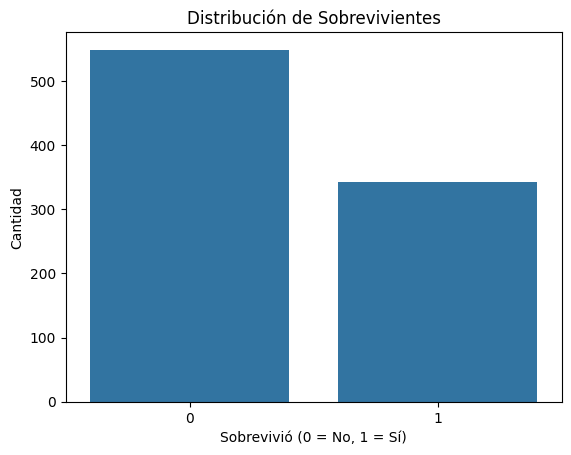

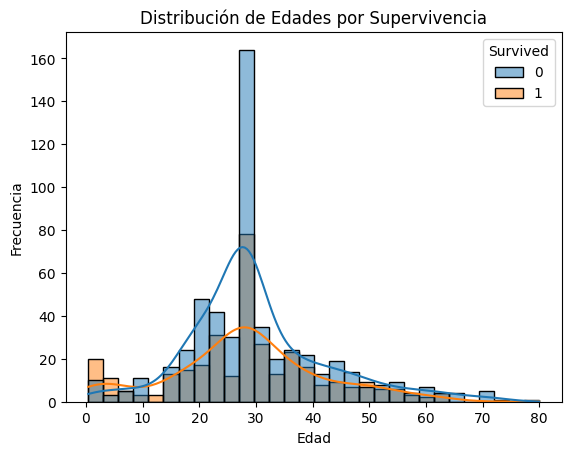

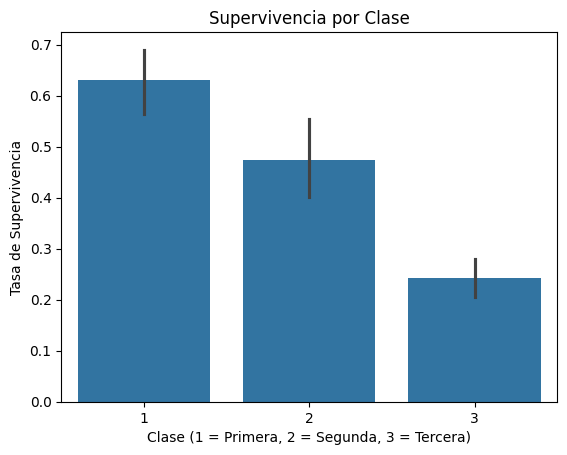

In [6]:
# 6. Visualización de datos
# Distribución de sobrevivientes
sns.countplot(x='Survived', data=df_selected)
plt.title('Distribución de Sobrevivientes')
plt.xlabel('Sobrevivió (0 = No, 1 = Sí)')
plt.ylabel('Cantidad')
plt.show()

# Distribución de edades por supervivencia
sns.histplot(data=df_selected, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Distribución de Edades por Supervivencia')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre clase y supervivencia
sns.barplot(x='Pclass', y='Survived', data=df_selected)
plt.title('Supervivencia por Clase')
plt.xlabel('Clase (1 = Primera, 2 = Segunda, 3 = Tercera)')
plt.ylabel('Tasa de Supervivencia')
plt.show()

In [7]:
# 7. Preparación de los datos para el modelo
X = df_selected.drop('Survived', axis=1)
y = df_selected['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'\nTamaño del conjunto de entrenamiento: {X_train.shape[0]}')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]}')


Tamaño del conjunto de entrenamiento: 712
Tamaño del conjunto de prueba: 179


In [8]:

# 8. Entrenamiento del modelo de Árbol de Decisión
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# 9. Predicciones
y_pred = dtree.predict(X_test)
y_pred_prob = dtree.predict_proba(X_test)[:,1]

print("\nPredicciones en el conjunto de prueba:")
print(y_pred[:10])


Predicciones en el conjunto de prueba:
[0 0 1 1 1 0 1 0 1 1]



Precisión del modelo: 0.79


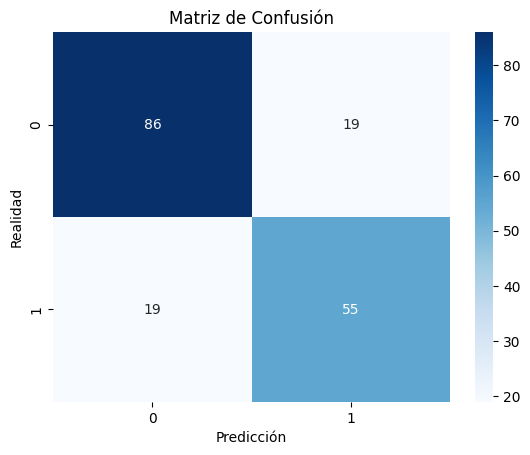


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



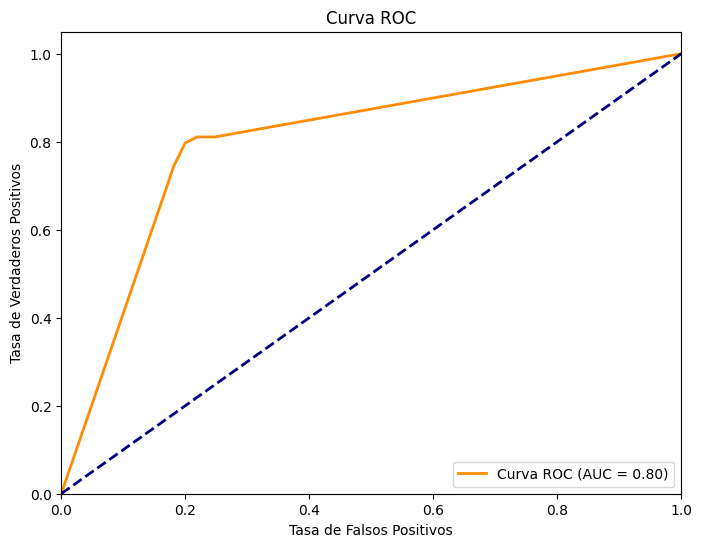

In [10]:
# 10. Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'\nPrecisión del modelo: {accuracy:.2f}')

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [24]:
# 11. Visualizar el Árbol de Decisión con plot_tree limitado
plt.figure(figsize=(20,10))
tree.plot_tree(
    dtree, 
    feature_names=X.columns, 
    class_names=['No', 'Sí'], 
    filled=True, 
    rounded=True,
    fontsize=12,
    max_depth=3  # Limita la profundidad para una mejor visualización
)
plt.title('Árbol de Decisión para Supervivencia en el Titanic (Profundidad Limitada)')
plt.show()


ImportError: cannot import name 'dtreeviz' from 'dtreeviz.trees' (c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\dtreeviz\trees.py)